In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score

In [ ]:
# load the dataset
data = pd.read_csv("D:\\Dhabe_Research\mc.csv")
X = data[["Annual Income (k$)", "Spending Score (1-100)"]]
print(X)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


In [ ]:
def z_score_normalization(data):
    mean = np.mean(data)
    std = np.std(data)
    data = (data - mean) / std
    return data

In [ ]:
import pandas as pd

# load the dataset
data = pd.read_csv("D:\\Dhabe_Research\mc.csv")
X = data[["Annual Income (k$)", "Spending Score (1-100)"]]

# normalize the dataset using the z_score_normalization function
X_normalized = z_score_normalization(X)


In [ ]:
print(X_normalized)

     Annual Income (k$)  Spending Score (1-100)
0             -1.738999               -0.434801
1             -1.738999                1.195704
2             -1.700830               -1.715913
3             -1.700830                1.040418
4             -1.662660               -0.395980
..                  ...                     ...
195            2.268791                1.118061
196            2.497807               -0.861839
197            2.497807                0.923953
198            2.917671               -1.250054
199            2.917671                1.273347

[200 rows x 2 columns]


In [ ]:
k=5

In [ ]:
# initialize centroids randomly
centroids = np.random.rand(k, X_normalized.shape[1])

# initialize weights as an empty array
weights = np.zeros((X_normalized.shape[0], k))


In [ ]:
    distances = np.zeros((X_normalized.shape[0], k))
    for j in range(k):
        distances[:, j] = np.linalg.norm(X_normalized - centroids[j], axis=1)
    clusters = np.argmin(distances, axis=1)



            


In [ ]:
    # calculate the reciprocal of the distance between each data point and the centroid of the cluster
    for j in range(k):
        weights[clusters == j, j] = 1 / distances[clusters == j, j]

    # calculate the weighted average of the data points in each cluster to update the centroids
    for j in range(k):
        if np.sum(weights[clusters == j, j]) != 0:
            centroids[j] = np.average(X_normalized[clusters == j], axis=0, weights=weights[clusters == j, j])

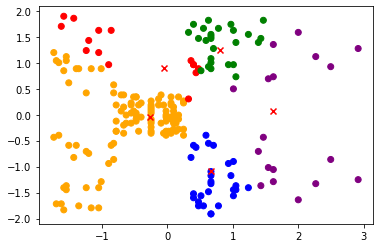

In [ ]:
x_coords = X_normalized.iloc[:, 0]
y_coords = X_normalized.iloc[:, 1]
plt.scatter(x_coords, y_coords, c=clusters, cmap=mcolors.ListedColormap(['blue', 'green', 'red', 'purple', 'orange']))
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')


In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_normalized, clusters)
print("Silhouette Score:", score)


Silhouette Score: 0.323232250570518
